In [ ]:
# Install basic packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

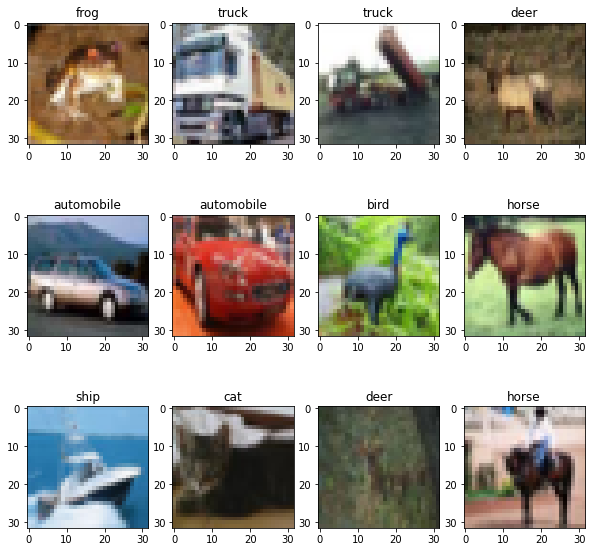

In [ ]:
plt.figure(figsize=(10,10))
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.imshow(x_train[i])
  plt.title(class_names[y_train[i]])

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(32,
                                  32,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
cnn_model = tf.keras.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn_model.summary()

In [ ]:
cnn_model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
epochs = 30
cnn_history = cnn_model.fit(x = x_train, y = y_train,
                    epochs = epochs,
                    validation_split=0.2)

In [ ]:
epochs = 15
cnn_history = cnn_model.fit(x = x_train, y = y_train,
                    epochs = epochs,
                    validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 26s 21ms/step - loss: 0.7972 - accuracy: 0.7204 - val_loss: 0.7370 - val_accuracy: 0.7554
Epoch 2/15
1250/1250 [==============================] - 24s 19ms/step - loss: 0.7865 - accuracy: 0.7247 - val_loss: 0.7264 - val_accuracy: 0.7467
Epoch 3/15
1250/1250 [==============================] - 26s 21ms/step - loss: 0.7867 - accuracy: 0.7235 - val_loss: 0.7725 - val_accuracy: 0.7377
Epoch 4/15
1250/1250 [==============================] - 25s 20ms/step - loss: 0.7795 - accuracy: 0.7282 - val_loss: 0.7201 - val_accuracy: 0.7549
Epoch 5/15
1250/1250 [==============================] - 25s 20ms/step - loss: 0.7718 - accuracy: 0.7282 - val_loss: 0.7260 - val_accuracy: 0.7559
Epoch 6/15
1250/1250 [==============================] - 25s 20ms/step - loss: 0.7769 - accuracy: 0.7282 - val_loss: 0.6923 - val_accuracy: 0.7663
Epoch 7/15
1250/1250 [==============================] - 24s 20ms/step - loss: 0.7699 - accuracy: 0.7315 - val_loss: 0.7263 -

In [ ]:
epochs = 15
cnn_history = cnn_model.fit(x = x_train, y = y_train,
                    epochs = epochs,
                    validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 26s 21ms/step - loss: 0.7411 - accuracy: 0.7427 - val_loss: 0.7207 - val_accuracy: 0.7558
Epoch 2/15
1250/1250 [==============================] - 25s 20ms/step - loss: 0.7348 - accuracy: 0.7416 - val_loss: 0.7241 - val_accuracy: 0.7570
Epoch 3/15
1250/1250 [==============================] - 27s 21ms/step - loss: 0.7268 - accuracy: 0.7463 - val_loss: 0.7381 - val_accuracy: 0.7533
Epoch 4/15
1250/1250 [==============================] - 24s 19ms/step - loss: 0.7289 - accuracy: 0.7437 - val_loss: 0.7505 - val_accuracy: 0.7568
Epoch 5/15
1250/1250 [==============================] - 26s 20ms/step - loss: 0.7249 - accuracy: 0.7456 - val_loss: 0.6868 - val_accuracy: 0.7670
Epoch 6/15
1250/1250 [==============================] - 25s 20ms/step - loss: 0.7260 - accuracy: 0.7458 - val_loss: 0.7729 - val_accuracy: 0.7504
Epoch 7/15
1250/1250 [==============================] - 26s 20ms/step - loss: 0.7194 - accuracy: 0.7482 - val_loss: 0.7228 -

# VGG16

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
vgg16_model = VGG16(weights = 'imagenet')
vgg16_model.summary()

553467096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
input_resize = tf.keras.layers.Resizing(height = 224, width = 224)
input_layer = layers.Input(shape=(32,32,3))

In [ ]:
vgg16_model = tf.keras.Sequential([
    layers.Input(shape=(32,32,3)),
    layers.Resizing(height = 224, width = 224),
    VGG16(weights='imagenet', include_top=False),
    layers.Flatten(),
    layers.Dense(10,activation='softmax')
])

In [ ]:
vgg16_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_4 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                250890    
                                                                 
Total params: 14,965,578
Trainable params: 14,965,578
Non-trainable params: 0
_________________________________________________________________


In [ ]:
vgg16_model.compile(optimizer = 'adam',
                    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                    metrics = ['accuracy'])

In [ ]:
vgg16_model.fit(x_train,y_train,epochs=5,batch_size=64,verbose=True,validation_data=(x_test,y_test))

Epoch 1/5
782/782 [==============================] - 675s 850ms/step - loss: 1.8116 - accuracy: 0.3312 - val_loss: 1.5822 - val_accuracy: 0.4256
Epoch 2/5
782/782 [==============================] - 664s 849ms/step - loss: 1.4336 - accuracy: 0.4814 - val_loss: 1.4079 - val_accuracy: 0.5044
Epoch 3/5
782/782 [==============================] - 679s 868ms/step - loss: 1.1383 - accuracy: 0.5992 - val_loss: 1.0605 - val_accuracy: 0.6223
Epoch 4/5
782/782 [==============================] - 678s 867ms/step - loss: 0.9543 - accuracy: 0.6628 - val_loss: 0.9417 - val_accuracy: 0.6745
Epoch 5/5
782/782 [==============================] - 676s 865ms/step - loss: 0.8269 - accuracy: 0.7112 - val_loss: 0.8434 - val_accuracy: 0.7093


In [ ]:
vgg16_model.fit(x_train,y_train,epochs=5,batch_size=64,verbose=True,validation_data=(x_test,y_test))

Epoch 1/5
782/782 [==============================] - 675s 864ms/step - loss: 0.7230 - accuracy: 0.7482 - val_loss: 0.8246 - val_accuracy: 0.7118
Epoch 2/5
782/782 [==============================] - 676s 864ms/step - loss: 0.6506 - accuracy: 0.7722 - val_loss: 0.7674 - val_accuracy: 0.7402
Epoch 3/5
782/782 [==============================] - 677s 866ms/step - loss: 0.5739 - accuracy: 0.8000 - val_loss: 0.7640 - val_accuracy: 0.7538
Epoch 4/5
782/782 [==============================] - 675s 863ms/step - loss: 0.5083 - accuracy: 0.8229 - val_loss: 0.7853 - val_accuracy: 0.7468
Epoch 5/5
782/782 [==============================] - 674s 862ms/step - loss: 0.4435 - accuracy: 0.8442 - val_loss: 0.8731 - val_accuracy: 0.7331
